# Comparative analysis of collected protein-protein interactions

The following section compares the protein-protein interactions collected from multiple online resources: ComPPI, ConsensusPathDB (CPDB), FunCoup, GeneMANIA, HIPPIE, our collection(Human), HumanNET, InBioMap, IRefIndex, and STRING.

For the four functional interaction resources (GeneMANIA, FunCoup, HumanNET and STRING), only the interactions derived from physical interactions are used. The following code blocks process and compare the content of each database and present the results as a table and heatmap.

### Comparing the number of database-specific interactions in each database

In [1]:
import os
from collections import defaultdict
import pandas as pd
from IPython.display import Image, display

project_directory = '/projects/ooihs/ReNet/'
data_directory = os.path.join(project_directory, 'results/final/')

images_directory = os.path.join(project_directory, 'results/images')
if not os.path.isdir(images_directory):
    os.makedirs(images_directory)

databases = [
    'ComPPI', 'CPDB', 'FunCoup', 'GeneMANIA', 'HIPPIE', 'Human', 
    'HumanNet', 'InBioMap', 'IRefIndex', 'STRING'
]

table = pd.DataFrame(0, index=databases, columns=['Total', 'Database-specific'])

# store the databases reporting an interaction
interactions = defaultdict(list)
# store the scores of each interaction
scores = defaultdict(dict)

# collect the number of interactions in each database, retrieve all scores
for dbname in databases:
    input_file = os.path.join(data_directory, 'score.' + dbname.lower())
    with open(input_file) as fhandle:
        count = 0
        for line in fhandle:
            col = line.strip().split('\t')
            iid = (col[0], col[1])
            interactions[iid].append(dbname)
            scores[dbname][iid] = float(col[2])
            count += 1
    table.loc[dbname, 'Total'] = count                          

# calculate the unique interactions only presented in one database
counts = defaultdict(int)
for i in interactions:
    if len(interactions[i]) == 1:
        counts[list(interactions[i])[0]] += 1
        
for dbname in counts:
    table.loc[dbname, 'Database-specific'] = counts[dbname]

display(table)

,Total,Database-specific
ComPPI,174813,6630
CPDB,261353,1025
FunCoup,455905,235536
GeneMANIA,259315,3086
HIPPIE,320225,3684
Human,498451,126054
HumanNet,59913,3604
InBioMap,615121,179239
IRefIndex,181464,115
STRING,257917,99382


# Comparative analysis of different scoring methods

The following code block compares the different scoring strategy used in the existing data collections. For IRefIndex and our own data collection (human), we used the number of reported publications for each interaction as the scores. The simple strategy has been used by many studies to filter noises in the existing protein-protein interactions. For GeneMANIA, as we collected the interactions from individual physical interaction studies, each interaction could be associated with more than one weights. Therefore, for each interaction, the maximum value of all associated weights was used as the final score. For the remaining databases, original scores were used.

,ComPPI,CPDB,FunCoup,GeneMANIA,HIPPIE,Human,HumanNet,InBioMap,IRefIndex,STRING
ComPPI,1.000000,0.337547,0.143621,-0.069291,0.086335,0.067208,0.142025,0.130092,0.046805,0.063190
CPDB,0.337547,1.000000,0.282154,-0.100741,0.060055,0.119105,0.242979,0.277015,0.093423,0.087242
FunCoup,0.143621,0.282154,1.000000,-0.056472,0.075066,0.089347,0.335988,0.201463,0.103800,0.161817
GeneMANIA,-0.069291,-0.100741,-0.056472,1.000000,0.128549,0.155862,0.031590,0.076133,0.044067,0.087933
HIPPIE,0.086335,0.060055,0.075066,0.128549,1.000000,0.386404,0.136755,0.185879,0.332679,0.382422
Human,0.067208,0.119105,0.089347,0.155862,0.386404,1.000000,0.140654,0.326094,0.770617,0.292795
HumanNet,0.142025,0.242979,0.335988,0.031590,0.136755,0.140654,1.000000,0.522596,0.174377,0.394979
InBioMap,0.130092,0.277015,0.201463,0.076133,0.185879,0.326094,0.522596,1.000000,0.387194,0.025090
IRefIndex,0.046805,0.093423,0.103800,0.044067,0.332679,0.770617,0.174377,0.387194,1.000000,0.104035
STRING,0.063190,0.087242,0.161817,0.087933,0.382422,0.292795,0.394979,0.025090,0.104035,1.000000


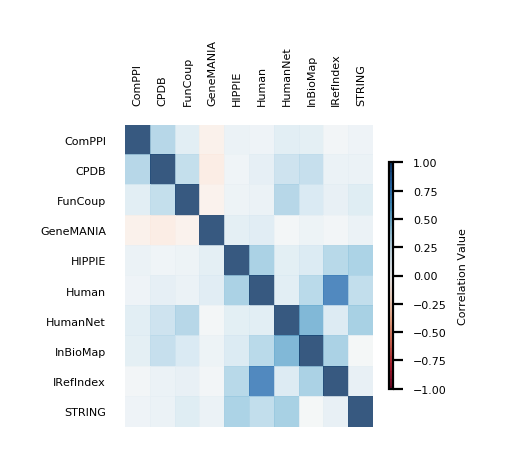

In [2]:
from src import utility

# calculate the pearson correlation between interactions shared by two
# databases
pearson, pcpvalue = utility.calculate_correlation(scores)
# save the correlation as a heatmap figure, 2in by 2in, it is fine to display
# in browser, for high-quality, increase the size.

image_file = os.path.join(images_directory, 'scores_pearson.png')
utility.plot_heatmap_figure(pearson, image_file, 2)

display(pearson)
Image(image_file)